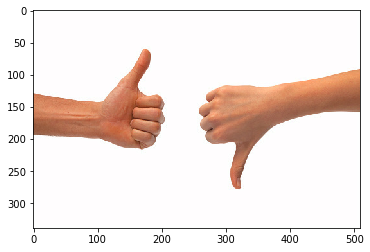

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline
image = cv2.imread('images/thumbs_up_down.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

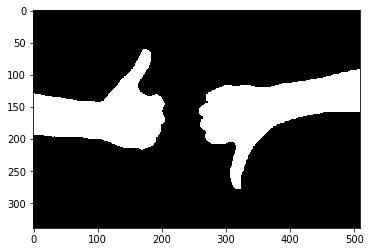

In [2]:
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary,cmap='gray')

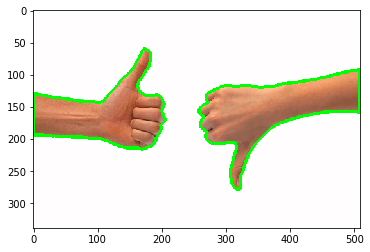

In [3]:
contours,hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image,contours,-1,(0,255,0),3)
plt.imshow(contours_image)
# contours

Angles of each contour (in degrees): [61.35833740234375, 82.27550506591797]


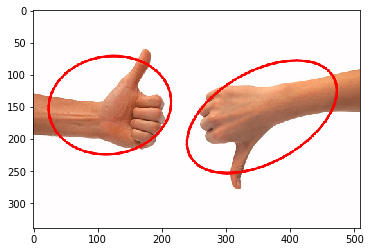

In [9]:
def orientations(countour_val):
    angles = []
#     a = cv2.fitEllipse(countour_val)
#     angles.append(a[2])
    for contour in countour_val:
        ellipse = cv2.fitEllipse(contour)
        cv2.ellipse(image,ellipse,(255,0,0),2,cv2.LINE_AA)
        angles.append(ellipse[2])
    plt.imshow(image)
    return angles
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

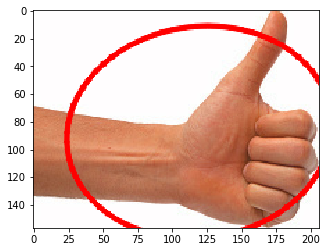

In [10]:
#bounding rectangle 
def left_hand_crop(image,selected_contour):
    x,y,w,h = cv2.boundingRect(selected_contour)
    cropped_image = np.copy(image)
    cropped_image = cropped_image[y:y+h,x:x+w]
    return cropped_image

selected_contour = contours[1]

if(selected_contour is not None):
    cropped_image = left_hand_crop(image,selected_contour)
    plt.imshow(cropped_image)